<b><font size="7"><center> Ames Iowa House Price Prediction</center></font></b>

<b><font size="5"><center> By Jonathan Zhao    </center></font><b>
<hr>

<img src="https://cdn-images-1.medium.com/max/1600/1*fnJuvByD5F6iC_E9y1wIDw.png" style="float: leftmargin: 300px; height: 300px">




***Notebook Guide***
- Exploratory Data Analysis(EDA)
- Data Cleaning
- Feature Engineering
- Ecoding Categorical Dummies
- Scaling Outliers
- Regression Models

In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('float_format', '{:f}'.format)

import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, RobustScaler
import statsmodels.api as sm
from scipy.stats import skew
from sklearn.linear_model import Ridge, RidgeCV, ElasticNetCV, LassoCV, LassoLarsCV, LinearRegression
from xgboost.sklearn import XGBRegressor
from sklearn.svm import SVR
import matplotlib

In [2]:
# load data
# train= pd.read_csv('./database/train.csv')
# test = pd.read_csv('./database/test.csv')
train = pd.read_csv('./database/Kaggle_data/train_(1).csv')
test = pd.read_csv('./database/Kaggle_data/test_(1).csv')

In [3]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL    65.000000     8450   Pave   NaN      Reg   
1   2          20       RL    80.000000     9600   Pave   NaN      Reg   
2   3          60       RL    68.000000    11250   Pave   NaN      IR1   
3   4          70       RL    60.000000     9550   Pave   NaN      IR1   
4   5          60       RL    84.000000    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0  196.000000        Gd        TA      PConc       Gd       TA           No   
1    0.000000        TA        TA     CBlock       Gd       TA           Gd   
2  162.000000        Gd        TA      PConc       Gd       TA           Mn   
3    0.000000        TA        TA     BrkTil       TA       Gd           No   
4  350.000000        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH    80.000000    11622   Pave   NaN      Reg   
1  1462          20       RL    81.000000    14267   Pave   NaN      IR1   
2  1463          60       RL    74.000000    13830   Pave   NaN      IR1   
3  1464          60       RL    78.000000     9978   Pave   NaN      IR1   
4  1465         120       RL    43.000000     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0    0.000000        TA        TA     CBlock       TA       TA           No   
1  108.000000        TA        TA     CBlock       TA       TA           No   
2    0.000000        TA        TA      PConc       Gd       TA           No   
3   20.000000        TA        TA      PConc       TA       TA           No   
4    0.000000        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2   BsmtUnfSF  TotalBsmtSF  \
0          Rec  468.000000          LwQ  144.000000  270.000000   882.000000   
1          ALQ  923.000000          Unf    0.000000  406.000000  1329.000000   
2          GLQ  791.000000          Unf    0.000000  137.000000   928.000000   
3          GLQ  602.000000          Unf    0.000000  324.000000   926.000000   
4          ALQ  263.000000          Unf    0.000000 1017.000000  1280.000000   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896      0.000000      0.000000         1         0             2   
1       1329      0.000000      0.000000         1         1             3   
2       1629      0.000000      0.000000         2         1             3   
3       1604      0.000000      0.000000         2         1             3   
4       1280      0.000000      0.000000         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1        

In [5]:
# have a peek of data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

- Here is what we learned from the info table  

    As we can see, there many missing values in serveral columns, our target column is SalePrice and it has no missing value. Next, we are going to explore the features we have and try to fix missing values.

count          mean          std          min           25%  \
SalePrice 1460.000000 180921.195890 79442.502883 34900.000000 129975.000000   

                    50%           75%           max  
SalePrice 163000.000000 214000.000000 755000.000000

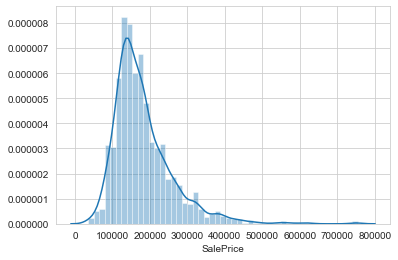

In [6]:
# distribution of our target and stats of distribution
sns.distplot(train['SalePrice']);
train.describe()[['SalePrice']].T

- Our target is right skewed, it makes me think linear model may not right fit for this or I need to transform the skewness 
- Next, we are going to plot correlation to see the relationship between ***numerical*** variables and the target
- We'll look at categorical varianles later on

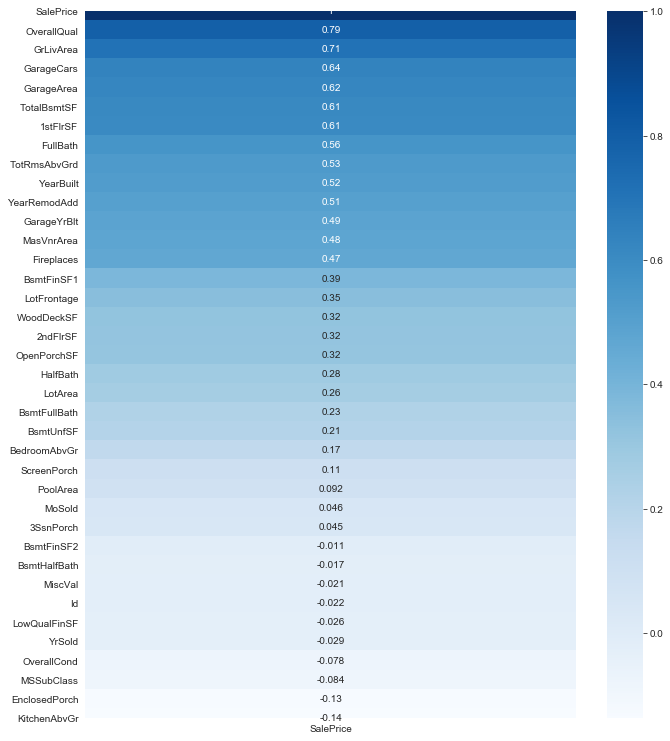

In [7]:
plt.figure(figsize=(11,13))
sns.heatmap(train.corr()[['SalePrice']].sort_values('SalePrice', ascending=False), annot=True, cmap='Blues');

- So far, we can see sale price has very strong positive corrlation with ***Overall Qual, Gr Liv Area, Garage Area, Garage Cars, Total Bsmt SF, 1st Flr SF, Year Built*** etc. We'll look into these features individually.

In [8]:
df_corr = train.corr()[['SalePrice']]
df_corr[df_corr['SalePrice']>=0.5].sort_values('SalePrice', ascending=False)

SalePrice
SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
1stFlrSF       0.605852
FullBath       0.560664
TotRmsAbvGrd   0.533723
YearBuilt      0.522897
YearRemodAdd   0.507101

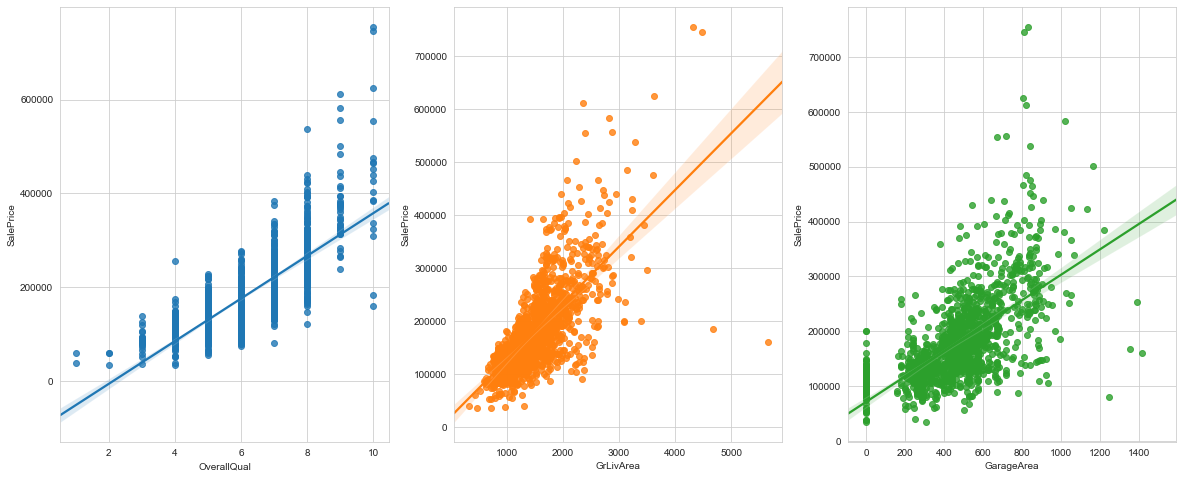

In [9]:
f, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,8))
sns.regplot(train['OverallQual'], train['SalePrice'], ax=ax1)
sns.regplot(train['GrLivArea'], train['SalePrice'], ax=ax2)
sns.regplot(train['GarageArea'], train['SalePrice'], ax=ax3);

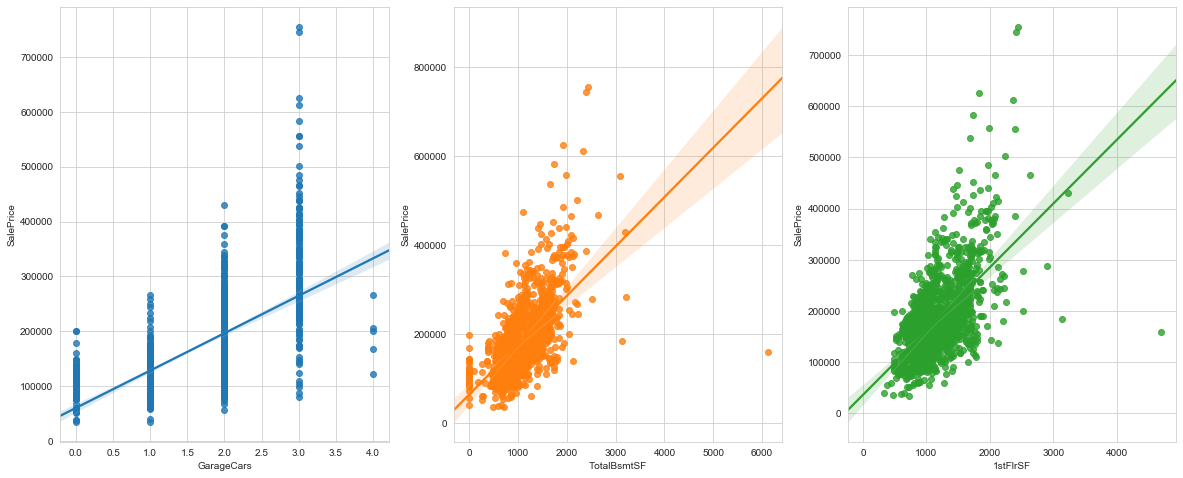

In [10]:
f, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,8))
sns.regplot(train['GarageCars'], train['SalePrice'], ax=ax1)
sns.regplot(train['TotalBsmtSF'], train['SalePrice'], ax=ax2)
sns.regplot(train['1stFlrSF'], train['SalePrice'], ax=ax3);

According to our above observations, we have noticed there are ordinal features have very strong correlation with the target that being said, we should also be caution with our the categorical features in our datasets. We'll need to convert categorical features into numerical data. 

#### What are the categorical columns and what included ####

In [11]:
# see what columns are object
non_numerical = train.select_dtypes(include="object")

In [12]:
# unique values in each non-numerical categorical columns
for col in non_numerical.columns:
    ls = non_numerical[col].unique().tolist()
    print(col, ls)

MSZoning ['RL', 'RM', 'C (all)', 'FV', 'RH']
Street ['Pave', 'Grvl']
Alley [nan, 'Grvl', 'Pave']
LotShape ['Reg', 'IR1', 'IR2', 'IR3']
LandContour ['Lvl', 'Bnk', 'Low', 'HLS']
Utilities ['AllPub', 'NoSeWa']
LotConfig ['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3']
LandSlope ['Gtl', 'Mod', 'Sev']
Neighborhood ['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst', 'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes', 'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert', 'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU', 'Blueste']
Condition1 ['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA', 'RRNe']
Condition2 ['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe']
BldgType ['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs']
HouseStyle ['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf', '2.5Fin']
RoofStyle ['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed']
RoofMatl ['CompShg', 'WdShngl', 'Metal', 'WdSha

#### Transforming non-numerical data into dummies ####

Before transforming non-numerical data into dummies I'd like to check if there is any missing value. We'll drop the variable if there is more than 80% of data missing

In [13]:
num_missing = train.isnull().sum()[train.isnull().sum()>0].sort_values(ascending=False)
num_rows = train.isnull().count()[train.isnull().sum()>0]
percent_missing = num_missing/num_rows
pd.concat([num_missing, num_rows, percent_missing], axis=1, keys=['missing', 'total', 'percent']).sort_values(by='percent', ascending=False)

missing  total  percent
PoolQC           1453   1460 0.995205
MiscFeature      1406   1460 0.963014
Alley            1369   1460 0.937671
Fence            1179   1460 0.807534
FireplaceQu       690   1460 0.472603
LotFrontage       259   1460 0.177397
GarageFinish       81   1460 0.055479
GarageQual         81   1460 0.055479
GarageType         81   1460 0.055479
GarageYrBlt        81   1460 0.055479
GarageCond         81   1460 0.055479
BsmtFinType2       38   1460 0.026027
BsmtExposure       38   1460 0.026027
BsmtFinType1       37   1460 0.025342
BsmtQual           37   1460 0.025342
BsmtCond           37   1460 0.025342
MasVnrArea          8   1460 0.005479
MasVnrType          8   1460 0.005479
Electrical          1   1460 0.000685

- Good news is there are only four features we need to drop.
- We'll drop the same columns in test dataset later on
- For other missing values features, we'll look into one by one and try to fill something that make sense to the feature

In [14]:
# drop these fetures
train.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True)
test.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True)

### Data Cleaning ###

1. Split the data to
    - Categorical data
    - Numerical data   
2. Fill something into the missing value

In [15]:
# split to categorical and numerical
train_cat = train.select_dtypes(include='object')
train_num = train.select_dtypes(exclude='object')
test_cat = test.select_dtypes(include='object')
test_num = test.select_dtypes(exclude='object')

In [16]:
#missing values in categorical features
train_cat.isnull().sum()[train_cat.isnull().sum()>0].sort_values(ascending=False)

FireplaceQu     690
GarageCond       81
GarageQual       81
GarageFinish     81
GarageType       81
BsmtFinType2     38
BsmtExposure     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrType        8
Electrical        1
dtype: int64

We'll start with the one with most missing values, we'll also look other features related to the one and try to understand it. For example, we'll look for features in the dataset related to fireplace

#### Missing Values Related to Fireplace Quality

In [17]:
train[train.columns[train.columns.str.contains('Fire')]][train['Fireplaces']==0]

Fireplaces FireplaceQu
0              0         NaN
5              0         NaN
10             0         NaN
12             0         NaN
15             0         NaN
...          ...         ...
1452           0         NaN
1453           0         NaN
1454           0         NaN
1458           0         NaN
1459           0         NaN

[690 rows x 2 columns]

Now, we understand that those houses without a fireplace would have missing value in fireplace quality feature! That makes a lot sense. We'll continue to use the same method to work on other features

We'll simply replace null to ***None***, since these don't have a fireplace at all. We can't simply fill 0s for categorical data because we'll use Encoding methode to transform non-numerical data.

In [18]:
train['FireplaceQu'].fillna('None', inplace=True)
test['FireplaceQu'].fillna('None', inplace=True)

#### Missing Values Related to Garage

Other features are all related to Garage and Basement, I had a feeling these features would have the similar issue as Fireplace features.

In [19]:
train[train.columns[train.columns.str.contains('Garage')]][train['GarageCond'].isnull()]

GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
39          NaN          nan          NaN           0           0        NaN   
48          NaN          nan          NaN           0           0        NaN   
78          NaN          nan          NaN           0           0        NaN   
88          NaN          nan          NaN           0           0        NaN   
89          NaN          nan          NaN           0           0        NaN   
99          NaN          nan          NaN           0           0        NaN   
108         NaN          nan          NaN           0           0        NaN   
125         NaN          nan          NaN           0           0        NaN   
127         NaN          nan          NaN           0           0        NaN   
140         NaN          nan          NaN           0           0        NaN   
148         NaN          nan          NaN           0           0        NaN   
155         NaN          nan          NaN           0           0        NaN   
163         NaN          nan          NaN           0           0        NaN   
165         NaN          nan          NaN           0           0        NaN   
198         NaN          nan          NaN           0           0        NaN   
210         NaN          nan          NaN           0           0        NaN   
241         NaN          nan          NaN           0           0        NaN   
250         NaN          nan          NaN           0           0        NaN   
287         NaN          nan          NaN           0           0        NaN   
291         NaN          nan          NaN           0           0        NaN   
307         NaN          nan          NaN           0           0        NaN   
375         NaN          nan          NaN           0           0        NaN   
386         NaN          nan          NaN           0           0        NaN   
393         NaN          nan          NaN           0           0        NaN   
431         NaN          nan          NaN           0           0        NaN   
434         NaN          nan          NaN           0           0        NaN   
441         NaN          nan          NaN           0           0        NaN   
464         NaN          nan          NaN           0           0        NaN   
495         NaN          nan          NaN           0           0        NaN   
520         NaN          nan          NaN           0           0        NaN   
528         NaN          nan          NaN           0           0        NaN   
533         NaN          nan          NaN           0           0        NaN   
535         NaN          nan          NaN           0           0        NaN   
562         NaN          nan          NaN           0           0        NaN   
582         NaN          nan          NaN           0           0        NaN   
613         NaN          nan          NaN           0           0        NaN   
614         NaN          nan          NaN           0           0        NaN   
620         NaN          nan          NaN           0           0        NaN   
635         NaN          nan          NaN           0           0        NaN   
636         NaN          nan          NaN           0           0        NaN   
638         NaN          nan          NaN           0           0        NaN   
649         NaN          nan          NaN           0           0        NaN   
705         NaN          nan          NaN           0           0        NaN   
710         NaN          nan          NaN           0           0        NaN   
738         NaN          nan          NaN           0           0        NaN   
750         NaN          nan          NaN           0           0        NaN   
784         NaN          nan          NaN           0           0        NaN   
826         NaN          nan          NaN           0           0        NaN   
843         NaN          nan          NaN           0           0        NaN   
921  

Most of missing values in garage related feature are caused by 0 value in garage area meaning these houses don't have a garage at all! We'll do the same as above to replace null to None, and we'll use encoding method later on.

In [20]:
[train[col].fillna('None', inplace=True) for col in train_cat.columns[train_cat.columns.str.contains('Garage')]]
[test[col].fillna('None', inplace=True) for col in train_cat.columns[train_cat.columns.str.contains('Garage')]]

[None, None, None, None]

#### Missing Values Related to Basement

In [21]:
train[train.columns[train.columns.str.contains('Bsmt')]][train['BsmtExposure'].isnull()].head()

BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
17       NaN      NaN          NaN          NaN           0          NaN   
39       NaN      NaN          NaN          NaN           0          NaN   
90       NaN      NaN          NaN          NaN           0          NaN   
102      NaN      NaN          NaN          NaN           0          NaN   
156      NaN      NaN          NaN          NaN           0          NaN   

     BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath  BsmtHalfBath  
17            0          0            0             0             0  
39            0          0            0             0             0  
90            0          0            0             0             0  
102           0          0            0             0             0  
156           0          0            0             0             0

Same issue for these Basement related features, these houses don't basement at all. So we'll replace null to None.

In [22]:
[train[col].fillna('None', inplace=True) for col in train_cat.columns[train_cat.columns.str.contains('Bsmt')]]
[test[col].fillna('None', inplace=True) for col in train_cat.columns[train_cat.columns.str.contains('Bsmt')]]

[None, None, None, None, None]

#### Missing Values Related to  Masonry veneer

In [23]:
train[train.columns[train.columns.str.contains('Mas')]][train['MasVnrArea'].isnull()]

MasVnrType  MasVnrArea
234         NaN         nan
529         NaN         nan
650         NaN         nan
936         NaN         nan
973         NaN         nan
977         NaN         nan
1243        NaN         nan
1278        NaN         nan

For this feature, we couldn't find too much related information. We just made simply assume those houses has Nan value in Masonry veneer area column they don't have Masonru veneer. So we'll replace null to None.

In [24]:
train['MasVnrType'].fillna('None', inplace=True)
test['MasVnrType'].fillna('None', inplace=True)

Double Check to see if there is any other missing values in categorical features

In [25]:
train.select_dtypes(include='object').isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

There is one more missing value in Electrical column, we are going fill that with its mode

In [26]:
# to see what is the most common value in electrical
train['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [27]:
train['Electrical'].fillna('SBrkr', inplace=True)

In [28]:
# final check missing value in non-numercail features
train.select_dtypes(include='object').isnull().sum().sum()

0

Looks good so far, we replace all missing values in categorical features, next we are going to look into numerical features

#### Missing Values in Numerical Features

In [29]:
train_num.isnull().sum()[train_num.isnull().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

According to the source online, Lot frontage means the lot or parcel side where it adjoins a street, boulevard or access way. We simply assumed those nan values in Lot Frontage features are the houses are not next to streets. So we'll replace nan to 0

In [30]:
train['LotFrontage'].fillna(0, inplace=True)
test['LotFrontage'].fillna(0, inplace=True)

In [31]:
# looking into missing values in numerical features related to garage
train[train.columns[train.columns.str.contains('Garage')]][train['GarageArea']==0]

GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
39         None          nan         None           0           0       None   
48         None          nan         None           0           0       None   
78         None          nan         None           0           0       None   
88         None          nan         None           0           0       None   
89         None          nan         None           0           0       None   
99         None          nan         None           0           0       None   
108        None          nan         None           0           0       None   
125        None          nan         None           0           0       None   
127        None          nan         None           0           0       None   
140        None          nan         None           0           0       None   
148        None          nan         None           0           0       None   
155        None          nan         None           0           0       None   
163        None          nan         None           0           0       None   
165        None          nan         None           0           0       None   
198        None          nan         None           0           0       None   
210        None          nan         None           0           0       None   
241        None          nan         None           0           0       None   
250        None          nan         None           0           0       None   
287        None          nan         None           0           0       None   
291        None          nan         None           0           0       None   
307        None          nan         None           0           0       None   
375        None          nan         None           0           0       None   
386        None          nan         None           0           0       None   
393        None          nan         None           0           0       None   
431        None          nan         None           0           0       None   
434        None          nan         None           0           0       None   
441        None          nan         None           0           0       None   
464        None          nan         None           0           0       None   
495        None          nan         None           0           0       None   
520        None          nan         None           0           0       None   
528        None          nan         None           0           0       None   
533        None          nan         None           0           0       None   
535        None          nan         None           0           0       None   
562        None          nan         None           0           0       None   
582        None          nan         None           0           0       None   
613        None          nan         None           0           0       None   
614        None          nan         None           0           0       None   
620        None          nan         None           0           0       None   
635        None          nan         None           0           0       None   
636        None          nan         None           0           0       None   
638        None          nan         None           0           0       None   
649        None          nan         None           0           0       None   
705        None          nan         None           0           0       None   
710        None          nan         None           0           0       None   
738        None          nan         None           0           0       None   
750        None          nan         None           0           0       None   
784        None          nan         None           0           0       None   
826        None          nan         None           0           0       None   
843        None          nan         None           0           0       None   
921  

Houses without a garage, they all had nan in Garage Yr Blt features. We'll replace this one with avege

Other features only had 1 or 2 missing values, we'll replace 0s to those since we had looked over those values before, these houses they would either don't have a garage or basement.

We are going to replace null in Garage Yr Blt with its medium value which is 1980

count        mean       std         min         25%  \
GarageYrBlt 1379.000000 1978.506164 24.689725 1900.000000 1961.000000   

                    50%         75%         max  
GarageYrBlt 1980.000000 2002.000000 2010.000000

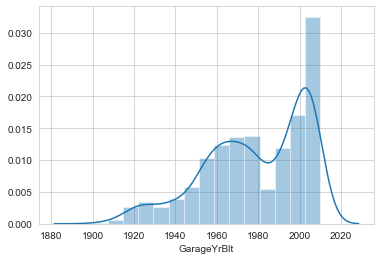

In [32]:
sns.distplot(train[~train['GarageYrBlt'].isna()]['GarageYrBlt']);
train.describe()[['GarageYrBlt']].T

In [33]:
# we'll use median to fillna 
train['GarageYrBlt'].fillna(1980, inplace=True)

In [34]:
# replace null to 0s for garage related 
[train[col].fillna(0, inplace=True) for col in train_num.columns[train_num.columns.str.contains('Garage')]]
[test[col].fillna(0, inplace=True) for col in train_num.columns[train_num.columns.str.contains('Garage')]]

[None, None, None]

In [35]:
# replace null to 0s for basement related 
[train[col].fillna(0, inplace=True) for col in train_num.columns[train_num.columns.str.contains('Bsmt')]]
[test[col].fillna(0, inplace=True) for col in train_num.columns[train_num.columns.str.contains('Bsmt')]]

[None, None, None, None, None, None]

In [36]:
# replace null to 0s for basement related 
[train[col].fillna(0, inplace=True) for col in train_num.columns[train_num.columns.str.contains('Mas')]]
[test[col].fillna(0, inplace=True) for col in train_num.columns[train_num.columns.str.contains('Mas')]]

[None]

Double check to see if there is other missing value in train and test datasets

In [37]:
#total missing value in train
train.isnull().sum()[train.isnull().sum()>0].sum()

0

In [38]:
# missing value in test
test.isnull().sum()[test.isnull().sum()>0]

MSZoning       4
Utilities      2
Exterior1st    1
Exterior2nd    1
KitchenQual    1
Functional     2
SaleType       1
dtype: int64

Well, we stil need to tackle some missing values in test but it's not too many, let's look over one by one
 - First, we are going to fill the most common value in MSZoning for the corresponding MSSubClass
 - Since utility only has single value in test dataset, we'll replace nan with that value
 - Nulls in exterior related features will be replace with the most common value in its YearRemod
 - Nulls in KitchenQual will be replaced by most common value in its corresponding KitchenAbvGr
 - There is one null in SaleType, we find the most common sale type in that MSSubClass and MSZoning is WD but the house had 10 month in the market which seems too long for that kind of sale type

In [39]:
# what are nulls
test[test['MSZoning'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
455   1916          30      NaN   109.000000    21780   Grvl      Reg   
756   2217          20      NaN    80.000000    14584   Pave      Reg   
790   2251          70      NaN     0.000000    56600   Pave      IR1   
1444  2905          20      NaN   125.000000    31250   Pave      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
455          Lvl       NaN    Inside       Gtl       IDOTRR       Norm   
756          Low    AllPub    Inside       Mod       IDOTRR       Norm   
790          Low    AllPub    Inside       Gtl       IDOTRR       Norm   
1444         Lvl    AllPub    Inside       Gtl      Mitchel     Artery   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
455        Norm     1Fam     1Story            2            4       1910   
756        Norm     1Fam     1Story            1            5       1952   
790        Norm     1Fam     2.5Unf            5            1       1900   
1444       Norm     1Fam     1Story            1            3       1951   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
455           1950     Gable  CompShg     Wd Sdng     Wd Sdng       None   
756           1952     Gable  CompShg     AsbShng     VinylSd       None   
790           1950       Hip  CompShg     Wd Sdng     Wd Sdng       None   
1444          1951     Gable  CompShg      CBlock     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
455     0.000000        Fa        Fa     CBlock     None     None   
756     0.000000        Fa        Po       Slab     None     None   
790     0.000000        TA        TA     BrkTil       TA       TA   
1444    0.000000        TA        Fa     CBlock     None     None   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
455          None         None    0.000000         None    0.000000   
756          None         None    0.000000         None    0.000000   
790            No          Unf    0.000000          Unf    0.000000   
1444         None         None    0.000000         None    0.000000   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
455    0.000000     0.000000    GasA        TA          N      FuseA   
756    0.000000     0.000000    Wall        Po          N      FuseA   
790  686.000000   686.000000    GasA        Ex          Y      SBrkr   
1444   0.000000     0.000000    GasA        TA          Y      FuseA   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
455        810         0             0        810      0.000000      0.000000   
756        733         0             0        733      0.000000      0.000000   
790       1150       686             0       1836      0.000000      0.000000   
1444      1600         0             0       1600      0.000000      0.000000   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
455          1         0             1             1          TA   
756          1         0             2             1          Fa   
790          2         0             4             1          TA   
1444         1         1             3             1          TA   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
455              4       Min1           0        None     Detchd  1975.000000   
756              4        NaN           0        None     Attchd  1952.000000   
790              7       Maj1           0        None     Detchd  1900.000000   
1444             6        Mod           0        None     Attchd  1951.000000   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
455           Unf    1.000000  280.000000         TA         TA          N   
756           Unf    2.000000  487.000000         Fa         Po          N   
790           Unf    1.000000  288.000000         TA       

In [40]:
# find most common MSZoning for MSSubClass 20
test[test['MSSubClass']==20]['MSZoning'].value_counts()

RL         508
FV          21
RM          10
RH           1
C (all)      1
Name: MSZoning, dtype: int64

In [41]:
# find most common MSZoning for MSSubClass 30
test[test['MSSubClass']==30]['MSZoning'].value_counts()

RM         34
RL         28
C (all)     6
RH          1
Name: MSZoning, dtype: int64

In [42]:
# find most common MSZoning for MSSubClass 70
test[test['MSSubClass']==70]['MSZoning'].value_counts()

RM         37
RL         27
C (all)     3
Name: MSZoning, dtype: int64

In [43]:
#using if statement to replace null
null_ix = test[test['MSZoning'].isnull()].index
for ix in null_ix:
    # locate to MSSubClass
    print(ix)
    if test.iloc[ix, 1] == 20:
        # replace value in MSZoning
        test.iloc[ix, 2] = 'RL'
    elif test.iloc[ix, 1] == 30 or 70:
        test.iloc[ix, 2] = 'RM'

455
756
790
1444


In [44]:
# double check
test[test['MSZoning'].isnull()]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition]
Index: []

In [45]:
# only one value in utility, we'll fill null with that value
test['Utilities'].value_counts()

AllPub    1457
Name: Utilities, dtype: int64

In [46]:
test['Utilities'].fillna('AllPub', inplace=True)

In [47]:
# looking at null value in Exterior realated features
test[test['Exterior1st'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
691  2152          30       RL    85.000000    19550   Pave      Reg   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
691         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
691       Norm     1Fam     1Story            5            7       1940   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
691          2007      Flat  Tar&Grv         NaN         NaN       None   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
691    0.000000        TA        TA      PConc       TA       TA           Gd   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
691          ALQ 1035.000000          Unf    0.000000 545.000000  1580.000000   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
691    GasA        Ex          Y      SBrkr      1518         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
691       1518      1.000000      0.000000         1         0             2   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
691             1          Fa             5        Typ           2   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
691          Gd       None     0.000000         None    0.000000    0.000000   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
691       None       None          Y           0           39              0   

     3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold SaleType  \
691          0            0         0        0       1    2008       WD   

    SaleCondition  
691        Normal

In [48]:
# the most common value in its remodle year
test[(test['YearRemodAdd']==2007)]['Exterior1st'].value_counts().head(1)

VinylSd    64
Name: Exterior1st, dtype: int64

In [49]:
# the most common value in its remodle year
test[(test['YearRemodAdd']==2007)]['Exterior2nd'].value_counts().head(1)

VinylSd    64
Name: Exterior2nd, dtype: int64

In [50]:
# replace nulls 
test['Exterior1st'].fillna('VinylSd', inplace=True)
test['Exterior2nd'].fillna('VinylSd', inplace=True)

In [51]:
# checking nulls in KitchenQuak
test[test['KitchenQual'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
95  1556          50       RL    72.000000    10632   Pave      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
95         Lvl    AllPub    Inside       Gtl      ClearCr       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
95       Norm     1Fam     1.5Fin            5            3       1917   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
95          1950     Gable  CompShg     Wd Sdng     Wd Sdng       None   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
95    0.000000        TA        TA     BrkTil       Gd       Fa           No   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
95          Unf    0.000000          Unf    0.000000 689.000000   689.000000   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
95    GasA        Gd          N      SBrkr       725       499             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
95       1224      0.000000      0.000000         1         1             3   

    KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
95             1         NaN             6        Mod           0        None   

   GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
95     Detchd  1917.000000          Unf    1.000000  180.000000         Fa   

   GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
95         Fa          N           0            0            248          0   

    ScreenPorch  PoolArea  MiscVal  MoSold  YrSold SaleType SaleCondition  
95            0         0        0       1    2010      COD        Normal

In [52]:
# most common value in KitchenQUal when KitchenAbvGr == 1
test[test['KitchenAbvGr']==1]['KitchenQual'].value_counts()

TA    697
Gd    563
Ex    105
Fa     27
Name: KitchenQual, dtype: int64

In [53]:
# fill TA
test['KitchenQual'].fillna('TA', inplace=True)

In [54]:
# checking nulls in KitchenQuak
test[test['Functional'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
756   2217          20       RL    80.000000    14584   Pave      Reg   
1013  2474          50       RM    60.000000    10320   Pave      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
756          Low    AllPub    Inside       Mod       IDOTRR       Norm   
1013         Lvl    AllPub    Corner       Gtl       IDOTRR     Artery   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
756        Norm     1Fam     1Story            1            5       1952   
1013       Norm     1Fam     1.5Fin            4            1       1910   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
756           1952     Gable  CompShg     AsbShng     VinylSd       None   
1013          1950     Gable  CompShg     Wd Sdng     Wd Sdng       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
756     0.000000        Fa        Po       Slab     None     None   
1013    0.000000        Fa        Fa     CBlock       TA       Fa   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
756          None         None    0.000000         None    0.000000   
1013           No          Unf    0.000000          Unf    0.000000   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
756    0.000000     0.000000    Wall        Po          N      FuseA   
1013 771.000000   771.000000    GasA        Fa          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
756        733         0             0        733      0.000000      0.000000   
1013       866       504           114       1484      0.000000      0.000000   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
756          1         0             2             1          Fa   
1013         2         0             3             1          TA   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
756              4        NaN           0        None     Attchd  1952.000000   
1013             6        NaN           0        None     Detchd  1910.000000   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
756           Unf    2.000000  487.000000         Fa         Po          N   
1013          Unf    1.000000  264.000000         TA         Fa          N   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
756            0            0              0          0            0   
1013          14          211              0          0           84   

      PoolArea  MiscVal  MoSold  YrSold SaleType SaleCondition  
756          0        0       2    2008       WD       Abnorml  
1013         0        0       9    2007      COD       Abnorml

In [55]:
train['Functional'].value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [56]:
# fill TA with the most common value
test['Functional'].fillna('Typ', inplace=True)

In [57]:
# checking nulls in KitchenQuak
test[test['SaleType'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
1029  2490          20       RL    85.000000    13770   Pave      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1029         Lvl    AllPub    Corner       Gtl       Sawyer      Feedr   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1029       Norm     1Fam     1Story            5            6       1958   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1029          1998     Gable  CompShg     Plywood     Plywood    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1029  340.000000        TA        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1029           Mn          Rec  190.000000          BLQ  873.000000   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1029  95.000000  1158.000000    GasA        TA          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1029      1176         0             0       1176      1.000000      0.000000   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1029         1         0             3             1          TA   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
1029             6        Typ           2          Gd     Attchd  1958.000000   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
1029          Unf    1.000000  303.000000         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1029           0            0              0          0            0   

      PoolArea  MiscVal  MoSold  YrSold SaleType SaleCondition  
1029         0        0      10    2007      NaN        Normal

In [58]:
# the most common sale type for that class and zone
train[(train['MSSubClass']==20)&(test['MSZoning']=='RL')]['SaleType'].value_counts()

WD       338
New       53
COD       20
Oth        2
ConLD      1
Name: SaleType, dtype: int64

In [59]:
# 10 month in the market seems fall into the last quartile
train[train['SaleType']=='WD']['MoSold'].describe()

count   1267.000000
mean       6.229676
std        2.685189
min        1.000000
25%        4.000000
50%        6.000000
75%        8.000000
max       12.000000
Name: MoSold, dtype: float64

In [60]:
# fill na
test['SaleType'].fillna('WD', inplace=True)

In [61]:
test.isnull().sum().sum()

0

Now, we have cleaned our data, we don't have any missing values in our train and test data any more. next we are going to do feature engineering

### Feature Engineering

We are going to use One Hot Encoding to create dummy variables for those non-numerical categorical features

***Note:*** We are using LabelEncoding here, because we are not trying to create ordinal relation here. However, there are may have some ordinal relations, such as House Style and Bldg Type, they indicate 1 story, 2story, but for the sake of this project, we'll ignore this for now. 

In [62]:
# creat new features
train['TtlArea'] = (train['TotalBsmtSF'] + train['GrLivArea'] + train['GarageArea'] 
                        + train['1stFlrSF'] + train['2ndFlrSF'])
train['TtlBath'] = (train['FullBath'] + train['HalfBath']*0.5)
train['WtYears'] = (train['YearRemodAdd'] + train['YearBuilt']*0.5)

test['TtlArea'] = (test['TotalBsmtSF'] + test['GrLivArea'] + test['GarageArea'] 
                        + test['1stFlrSF'] + test['2ndFlrSF'])
test['TtlBath'] = (test['FullBath'] + test['HalfBath']*0.5)
test['WtYears'] = (test['YearRemodAdd'] + test['YearBuilt']*0.5)

In [71]:
# we can use pd.get_dummies or onehotencoder for the simplicity of code, I'll use pd.get_dummies
# we need to combine out train and test datasets in order to get the same dummy columns
combined_dum = pd.get_dummies(pd.concat([train, test]))
# split them back to train and test
train_dum = combined_dum[combined_dum['Id'].isin(train['Id'])]
test_dum = combined_dum[combined_dum['Id'].isin(test['Id'])]
print("The shape of dataset without dummies", train.shape)
print("The shape of dataset with dummies", train_dum.shape)
print("The shape of dataset without dummies in test", test.shape)
print("The shape of dataset with dummiesin test", test_dum.shape)
print("We created 210 dummy features")

The shape of dataset without dummies (1460, 80)
The shape of dataset with dummies (1460, 290)
The shape of dataset without dummies in test (1459, 79)
The shape of dataset with dummiesin test (1459, 290)
We created 210 dummy features


Wow! I believe there are many dummies would cause multilinear issue, we'll take a closer look later.

#### Creating New Features ####

Since area and year features have very strong correlation, we'll star from there  
Following are new features:  

<b>Total Bathrooms</b> = num of full bath + half bath * 0.5  
***Total Area*** = 1st floor sf + 2nd floor sf + ground living area + garage area  
***Weighted Years*** = year remodeled + year built * 0.5 

In [72]:
train_dum.corr()[['SalePrice']].sort_values('SalePrice', ascending=False).head(10)

SalePrice
SalePrice     1.000000
TtlArea       0.801018
OverallQual   0.790982
GrLivArea     0.708624
GarageCars    0.640409
GarageArea    0.623431
TotalBsmtSF   0.613581
1stFlrSF      0.605852
TtlBath       0.597966
WtYears       0.573942

So far, we can see our newly created features have very strong correlation with our target. I may need to drop the features which are already in a part of interaction terms. Next, we'll move on to transform skewed numeric features

#### Dealing With Outliers

Our intetion is not to move any outliers because they are real situation, removing them may affect badly to our model. Instead of removing them, we 'll try to understand it

#### Transforming Skewd Features

The way we are going to spot skewed features is to use the rule of thumb, if the skewness is less than -1 or greated 1, we would say the data are highly skewed. Let's calculate their skewness now

In [73]:
train.skew().sort_values(ascending=False).head(20)

MiscVal         24.476794
PoolArea        14.828374
LotArea         12.207688
3SsnPorch       10.304342
LowQualFinSF     9.011341
KitchenAbvGr     4.488397
BsmtFinSF2       4.255261
ScreenPorch      4.122214
BsmtHalfBath     4.103403
EnclosedPorch    3.089872
MasVnrArea       2.677616
OpenPorchSF      2.364342
SalePrice        1.882876
BsmtFinSF1       1.685503
WoodDeckSF       1.541376
TotalBsmtSF      1.524255
TtlArea          1.489014
MSSubClass       1.407657
1stFlrSF         1.376757
GrLivArea        1.366560
dtype: float64

There are many ways to scale numerical data such as logarithm, standard scaler

In [74]:
# apply log1p to features have skewness >= 0.75
train_dum_scaled = train_dum.copy()
test_dum_scaled = test_dum.copy()
train_dum_scaled[train.skew()[train.skew()>=0.75].index] = np.log1p(train_dum_scaled[train.skew()[train.skew()>=0.75].index])
test_dum_scaled[test.skew()[test.skew()>=0.75].index] = np.log1p(test_dum_scaled[test.skew()[test.skew()>=0.75].index])

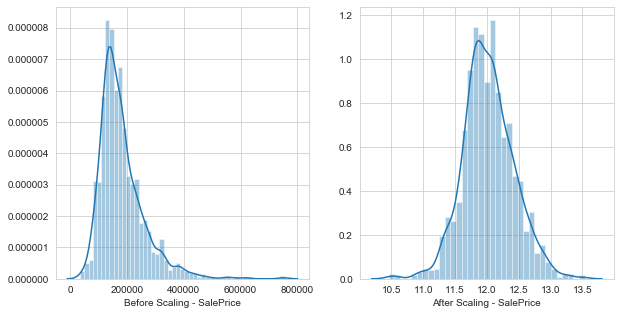

In [75]:
# let's compare before and after scaling
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
sns.distplot(train_dum['SalePrice'], axlabel="Before Scaling - SalePrice", ax=ax1)
sns.distplot(train_dum_scaled['SalePrice'], axlabel="After Scaling - SalePrice", ax=ax2);

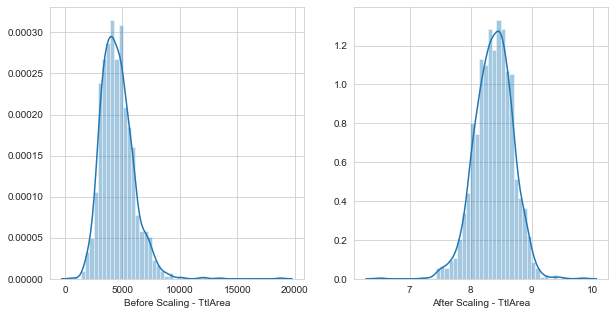

In [76]:
# let's compare before and after scaling
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
sns.distplot(train_dum['TtlArea'], axlabel="Before Scaling - TtlArea", ax=ax1)
sns.distplot(train_dum_scaled['TtlArea'], axlabel="After Scaling - TtlArea", ax=ax2);

As we can see from the comparisons above, these skewed data seems more normal.

### Modeling 

We'll build following models and choose one based on its performance
    - Linear Regression
    - Linear Regression with Regularization (Ridge, Lasso)
    - Ensemble Models(XGBoost, RandomForeset)

Train Test Split

In [77]:
x = train_dum_scaled.drop(['SalePrice'], axis=1)
y = train_dum_scaled['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=99)

#### Linear Regression

In [78]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [80]:
cross_val_score(lm, X_test, y_test, cv=kf)

array([0.8464967 , 0.74583529, 0.77272959, 0.67239718, 0.47213093])

From the cross validation result, we see the model's performance is not stable

In [81]:
cross_val_score(lm, X_test, y_test,scoring='neg_mean_squared_error', cv=kf).mean(), np.sqrt(-cross_val_score(lm, X_test, y_test,scoring='neg_mean_squared_error', cv=kf).mean())

(-0.04622415049508647, 0.2149980243981011)

#### Linear Regression with Ridge Penalty ####
- Ridge regression will penalizes the error since we created so many dummies for non-numerical categorical data, regression model with penalty could be a perfect candidate for our dataset
- It needs to turning parameter to find the best aloha to minimize errors
- We need to ***standardize*** our data before trying ridge and lass
- Ridge can also help us to choose important features

In [82]:
# scaling the data
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
test_scaled = scaler.fit_transform(test_dum_scaled)
#put them back to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
test_scaled = pd.DataFrame(test_scaled, columns=test_dum_scaled.columns)

In [83]:
#gridsearch cv to find the best alpha minimize errors, ridgecv works as the similar way
ridge = RidgeCV(alphas=np.linspace(1,100,3000))
ridge.fit(X_train_scaled, y_train)
print("The best alpha is ",ridge.alpha_)

The best alpha is  22.325108369456487


In [84]:
ridge.score(X_test_scaled, y_test), cross_val_score(ridge, X_test_scaled, y_test, cv=kf)

(0.8765450546006477,
 array([0.8987693 , 0.84733801, 0.79191709, 0.88036277, 0.896633  ]))

In [85]:
cross_val_score(ridge, X_test_scaled, y_test,scoring='neg_mean_squared_error', cv=kf).mean(), np.sqrt(-cross_val_score(ridge, X_test_scaled, y_test,scoring='neg_mean_squared_error', cv=kf).mean())

(-0.022066544059086424, 0.14854812034854706)

Ridge seems did much better than simple linear regression model. We'll try to interpret what did model do.

Right now, all the data are on the same scale, the most important features should have the highest coefficients in the model, while unrelated features should have close to zero coeffecient because the penalty is give to those features

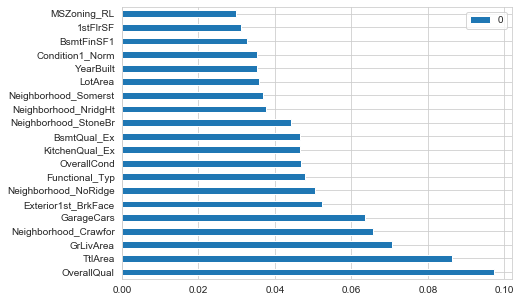

In [86]:
pd.DataFrame(ridge.coef_, X_train_scaled.columns).sort_values(by=0, ascending=False).head(20).plot.barh(figsize=(7,5));

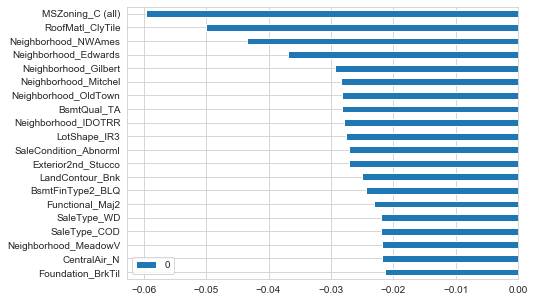

In [87]:
pd.DataFrame(ridge.coef_, X_train_scaled.columns).sort_values(by=0, ascending=False).tail(20).plot.barh(figsize=(7,5));

#### Linear Regression with Lasso ####
- Lasso works similarly as Ridge but Ridge can't zero out coefficient. Lasso does both parameter shrinkage and feature selection 

In [88]:
lasso = LassoCV(cv=5, random_state=88)
lasso.fit(X_train_scaled, y_train)
print(lasso.alpha_)

0.00039036102094685806


In [89]:
lasso.score(X_test_scaled, y_test),  cross_val_score(lasso, X_test_scaled, y_test, cv=kf)

(0.8813507226852777,
 array([0.89565808, 0.85124935, 0.77891187, 0.8901195 , 0.90543513]))

In [90]:
cross_val_score(lasso, X_test_scaled, y_test,scoring='neg_mean_squared_error', cv=kf).mean(), np.sqrt(-cross_val_score(lasso, X_test_scaled, y_test,scoring='neg_mean_squared_error', cv=kf).mean())

(-0.021886697896195427, 0.14794153539893867)

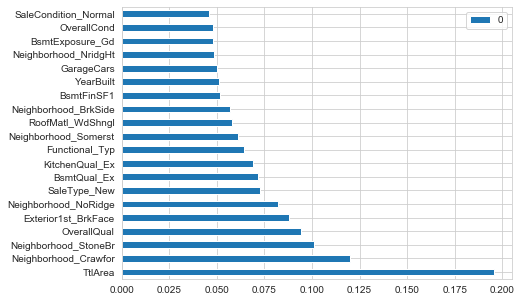

In [91]:
pd.DataFrame(lasso.coef_, X_train_scaled.columns).sort_values(by=0, ascending=False).head(20).plot.barh(figsize=(7,5));

Interesting to see Ridge and Lasso have similar choices of top 20 features. Next, we are going to try Elastic Net, it could helps to solve some multilineary issues that indeed exists in our dataset

#### Linear Regression with Elastic Net ####
    - In theory, Elastic Net is supposed to deal with multilineary better. We'll see how this model perform

In [92]:
enet = ElasticNetCV(alphas=np.linspace(0,1,1000))
enet.fit(X_train_scaled, y_train)
print(enet.alpha_)

0.001001001001001001


In [93]:
enet.score(X_test_scaled, y_test), cross_val_score(enet, X_test_scaled, y_test, cv=kf)

(0.8819014479362147,
 array([0.89437997, 0.8521807 , 0.78331705, 0.88903855, 0.90562623]))

In [94]:
cross_val_score(enet, X_test_scaled, y_test,scoring='neg_mean_squared_error', cv=kf).mean(), np.sqrt(-cross_val_score(enet, X_test_scaled, y_test,scoring='neg_mean_squared_error', cv=kf).mean())

(-0.021763085857304944, 0.14752317057772635)

Seems like all these three models have perfomed similarly. Next We'll try other regressor.

### XGBoost ###

- XGB should be the best perfomer here
- it has stricter penalty then lasso and ridge
- the downside is the slight change of hyperparametr could have big impact to the results

In [95]:
%%time
xgb=XGBRegressor(colsample_bytree=0.5, gamma=0.5, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.8, n_estimators=2500,
                             reg_alpha=0.5, reg_lambda=0.9,
                             subsample=0.5, silent=1,
                             random_state =89, nthread = -1)

xgb.fit(X_train_scaled, y_train)

CPU times: user 8.46 s, sys: 13.4 ms, total: 8.47 s
Wall time: 7.55 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=0.5, gamma=0.5, learning_rate=0.05,
             max_delta_step=0, max_depth=3, min_child_weight=1.8, missing=None,
             n_estimators=2500, n_jobs=1, nthread=-1, objective='reg:linear',
             random_state=8, reg_alpha=0.5, reg_lambda=0.9, scale_pos_weight=1,
             seed=None, silent=1, subsample=0.5)

In [96]:
xgb.score(X_test_scaled, y_test), cross_val_score(enet, X_test_scaled, y_test, cv=kf)

(0.8529838518017467,
 array([0.89437997, 0.8521807 , 0.78331705, 0.88903855, 0.90562623]))

In [97]:
cross_val_score(lasso, X_test_scaled, y_test,scoring='neg_mean_squared_error', cv=kf).mean(), np.sqrt(-cross_val_score(lasso, X_test_scaled, y_test,scoring='neg_mean_squared_error', cv=kf).mean())

(-0.021886697896195427, 0.14794153539893867)

XGB has high reputation for accurate prediction but it relys on turning hyperparameter. 

### Generate Submission File

In [ ]:
test_scaled['SalePrice']

In [114]:
prediction = xgb.predict(test_scaled.drop('SalePrice', axis=1))

In [115]:
submission = pd.DataFrame({'Id': test['Id'],
              'SalePrice': np.expm1(prediction)})

In [116]:
submission.to_csv('submission66.csv', index=False)